### Курсовой проект Михачева Евгения 
### по прогнозированию цен на жилую недвижимость.

Извиняюсь за бардак в коде, запоздал с решением. Возможно успею сделать более красивым до проверки

In [194]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

pd.options.display.max_columns = 100
%matplotlib inline

In [195]:
data = pd.read_csv('input/train.csv')

In [196]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [197]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [198]:
data.loc[data['Shops_2'] == 'A', :].count()

Id               825
DistrictId       825
Rooms            825
Square           825
LifeSquare       548
KitchenSquare    825
Floor            825
HouseFloor       825
HouseYear        825
Ecology_1        825
Ecology_2        825
Ecology_3        825
Social_1         825
Social_2         825
Social_3         825
Healthcare_1     154
Helthcare_2      825
Shops_1          825
Shops_2          825
Price            825
dtype: int64

In [199]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


#### train_test_split

In [200]:
train, valid = train_test_split(data, test_size=0.3, random_state=42)

In [201]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9069,14604,23,1.0,41.681380,22.796166,8.0,14,17.0,2015,0.075779,B,B,6,1437,3,NaN,0,2,B,88504.384965
2603,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,207007.956663
7738,235,87,1.0,39.710131,19.538663,8.0,4,17.0,1986,0.100456,B,B,43,7227,0,NaN,1,6,A,182126.280899
1579,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017,0.041125,B,B,46,9515,5,NaN,1,10,B,524365.550705
5058,10773,77,3.0,79.195825,44.421062,10.0,16,17.0,1984,0.298205,B,B,16,4048,3,NaN,1,3,B,322048.433990


Рассмотрим исходные данные

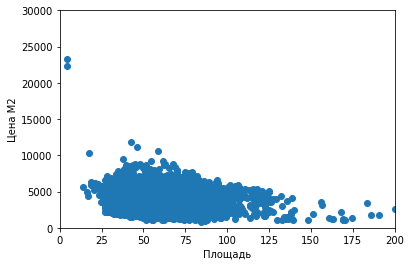

In [202]:
plt.scatter(train['Square'], train['Price']/train['Square'])
plt.axis([0, 200,0,30000])
plt.xlabel('Площадь')
plt.ylabel('Цена М2')
plt.show()

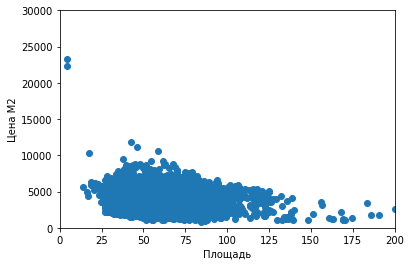

In [203]:
plt.scatter(train['Square'], train['Price']/train['Square'])
plt.axis([0, 200,0,30000])
plt.xlabel('Площадь')
plt.ylabel('Цена М2')
plt.show()

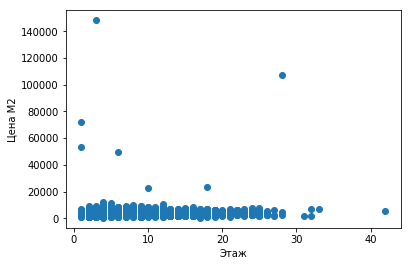

In [204]:
plt.scatter(train['Floor'], train['Price']/train['Square'])
#plt.axis([0, 200,0,30000])
plt.xlabel('Этаж')
plt.ylabel('Цена М2')
plt.show()
#Небольшой рост с этажом поначалу есть, но в высотках жилье среднее по цене

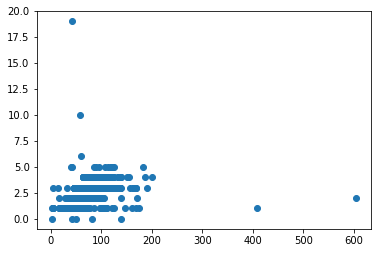

In [205]:
plt.scatter(train['Square'], train['Rooms'])
#plt.axis([0, 1000,0,700000])
plt.show()

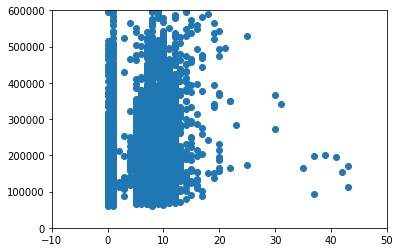

In [206]:
plt.scatter(train['KitchenSquare'], train['Price'])
plt.axis([-10, 50,0,600000])
plt.show()
# Есть небольшая зависимость, но она веротяно больше косвенная( от общей площади). И много неточных данных

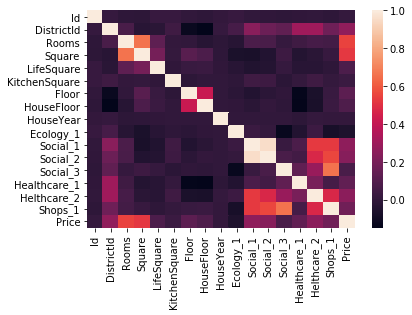

In [207]:
data_corr = data.corr()
sns.heatmap(data_corr, 
           xticklabels=data_corr.columns,
           yticklabels=data_corr.columns)

In [208]:
high_corr = data_corr.drop('Price', axis=0)
high_corr = high_corr[high_corr['Price']**2>0.02]
high_corr.axes[0].tolist()

['DistrictId',
 'Rooms',
 'Square',
 'Social_1',
 'Social_2',
 'Helthcare_2',
 'Shops_1']

In [209]:
train.loc[train['HouseYear'] > 2020, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396


In [210]:
# А ведь с полным датафреймом будет точнее
mean_year = np.round(data.loc[(data['HouseYear']<= 2020) & (data['HouseYear']>= 1813) , 'HouseYear'].mean())
mean_year

1985.0

In [211]:
train.loc[train['HouseYear'] < 1917, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2656,14556,183,4.0,151.150660,98.187482,23.0,6,7.0,1912,0.037316,B,B,32,6748,93,562.0,4,10,B,284884.959104
7611,7920,183,3.0,102.964468,48.322107,14.0,4,6.0,1916,0.037316,B,B,32,6748,93,562.0,4,10,B,284608.939261
910,6751,172,2.0,56.172364,28.384213,7.0,8,6.0,1914,0.000000,B,B,7,1660,39,1786.0,1,5,B,423580.477982


In [212]:
    
train.loc[train['KitchenSquare'] <5 , :].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1579,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017,0.041125,B,B,46,9515,5,NaN,1,10,B,524365.550705
5753,3766,62,3.0,127.417560,NaN,0.0,9,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,282877.332154
477,8849,45,1.0,63.419553,2.286357,1.0,3,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B,325600.765809
9642,16202,105,1.0,22.072457,16.540036,2.0,4,9.0,1963,0.069660,B,B,31,6119,4,NaN,1,2,B,126778.794309
1777,15980,1,1.0,42.106365,41.782263,1.0,15,1.0,2019,0.007122,B,B,1,264,0,NaN,0,1,B,138632.726757


In [213]:
train.loc[train['KitchenSquare'] >50 , :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8584,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275
227,16395,2,3.0,79.722243,44.731219,72.0,12,16.0,1987,0.130618,B,B,39,10418,9,900.0,1,9,B,370148.625285
4651,12552,58,3.0,116.405693,113.109653,112.0,3,3.0,2016,0.437885,B,B,23,5735,3,1084.0,0,5,B,296165.936689
5162,11739,27,2.0,61.070298,59.845092,58.0,8,17.0,2016,0.072158,B,B,2,629,1,NaN,0,0,A,212188.959537
9889,12918,23,2.0,51.440463,53.134243,51.0,3,17.0,2017,0.005767,B,B,1,388,0,NaN,0,0,B,88150.012510
2916,12390,72,3.0,97.490674,99.323558,96.0,22,25.0,2019,0.210473,B,B,11,2398,2,1994.0,3,0,B,445074.956552
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484207
5888,16593,52,2.0,64.859242,NaN,62.0,15,17.0,1977,0.371149,B,B,34,7065,1,750.0,2,5,B,185993.474671
5904,673,27,1.0,54.418214,51.498581,51.0,10,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A,133273.635012
1455,12507,54,2.0,79.810535,79.578961,78.0,10,15.0,2014,0.006076,B,B,30,5285,0,645.0,6,6,B,438708.707579


In [214]:
train.loc[train['Square'] >170 , :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,NaN,1,4,B,528560.506016
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.242538
652,3718,56,3.0,190.857689,107.376164,19.0,7,3.0,2007,0.000000,B,B,23,5067,4,NaN,2,6,B,338644.075979
4487,13434,13,5.0,183.382273,100.985505,15.0,2,6.0,1997,0.090799,B,B,74,19083,2,NaN,5,15,B,622888.825328
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
7084,5376,93,2.0,170.379494,NaN,1.0,3,2.0,1977,0.004949,B,B,0,186,0,NaN,0,0,B,194582.912756
1641,11055,151,1.0,174.649522,174.837082,15.0,10,12.0,1958,0.236108,B,B,16,3893,27,NaN,3,10,B,232766.187698
5087,15947,129,4.0,185.906396,84.830074,31.0,5,3.0,2015,0.020741,B,B,24,5613,5,1340.0,2,5,B,340273.238253


In [215]:
train.loc[train['Square'] <10.0 , :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,369472.403061
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,NaN,0,1,B,97560.720383
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,237716.681261
9613,7657,38,1.0,4.502784,4.618547,1.0,28,1.0,1977,0.060753,B,B,15,2787,2,520.0,0,7,B,483283.488083
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,107604.269441
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
9294,6782,45,1.0,2.954309,5.257278,1.0,3,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B,438005.182323


In [216]:
train.loc[train['Rooms']<1, :]
# 0 комнат редко встречается, учтем что где есть LifeSquare, там точно есть комната. 

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798


In [217]:
train.loc[train['Rooms']>5, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B,229661.964416
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792


In [218]:
train.loc[train['Square']>200, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,NaN,1,4,B,528560.506016
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.242538
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830


In [219]:
train.loc[train['LifeSquare']>200, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,NaN,1,4,B,528560.506016
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,NaN,0,0,B,217357.492366
8437,15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,2300.0,1,7,B,394253.299978
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830


In [220]:
train.loc[train['HouseFloor']>40, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8854,78,30,2.0,65.773749,66.811789,1.0,8,117.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,207248.370520
6131,10806,5,1.0,51.944587,48.709601,1.0,6,99.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,296127.115515
4323,6589,30,1.0,62.110823,52.812128,4.0,31,44.0,2009,0.000078,B,B,22,6398,141,1046.0,3,23,B,117647.461002
2781,1674,76,2.0,74.344672,41.044132,5.0,42,48.0,2016,0.000000,B,B,7,1660,39,1786.0,1,5,B,411691.504766
8599,9300,74,2.0,71.747869,74.579809,9.0,5,99.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,243329.912579
3974,6502,20,1.0,126.389517,103.637322,14.0,22,47.0,2012,0.019509,B,B,37,7687,11,176.0,5,5,B,450706.552655


In [221]:
#Средняя цена метра на 1 этаже
train.loc[train['Floor'] == 1, 'Price'].sum()/train.loc[train['Floor'] == 1, 'Square'].sum()


3452.9511180000104

In [222]:
#Средняя цена метра на остальных этажах
#train.loc[(train['Floor'] > 1) & (train['Floor'] ==train['HouseFloor']), 'Price'].sum()/train.loc[(train['Floor'] > 1)& (train['Floor'] ==train['HouseFloor']), 'Square'].sum()
train.loc[(train['Floor'] > 1) , 'Price'].sum()/train.loc[(train['Floor'] > 1), 'Square'].sum()

3816.2027121038022

In [223]:
train.loc[train['Floor'] > train['HouseFloor'], :].head(20)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2603,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,207007.956663
1579,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017,0.041125,B,B,46,9515,5,NaN,1,10,B,524365.550705
5753,3766,62,3.0,127.417560,NaN,0.0,9,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,282877.332154
3548,11463,129,3.0,72.953912,39.478723,9.0,16,15.0,1991,0.460556,B,B,20,4386,14,NaN,1,5,B,358129.914474
2726,9347,27,1.0,46.513651,21.032802,14.0,7,6.0,1977,0.075424,B,B,11,3097,0,NaN,0,0,B,124345.245905
477,8849,45,1.0,63.419553,2.286357,1.0,3,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B,325600.765809
1777,15980,1,1.0,42.106365,41.782263,1.0,15,1.0,2019,0.007122,B,B,1,264,0,NaN,0,1,B,138632.726757
468,12189,28,3.0,76.205998,46.656823,10.0,18,17.0,2000,0.333892,B,B,30,6564,1,NaN,0,0,B,361460.801718
5368,15597,169,2.0,68.896696,5.336872,1.0,11,1.0,2016,0.178917,B,B,18,3594,4,192.0,1,5,B,338780.798345
3881,13291,44,2.0,48.003717,32.700670,5.0,7,5.0,1961,0.036122,B,B,24,4378,0,1036.0,1,1,B,180646.782352


In [224]:
#Средняя цена метра на остальных этажах
train.loc[train['Floor'] ==train['HouseFloor'], 'Price'].sum()/train.loc[train['Floor'] ==train['HouseFloor'], 'Square'].sum()

3819.5594178252795

In [225]:
train.loc[train['Floor'] >1 , 'Price'].mean()

215203.87113497863

#### Обработка данных

In [226]:


mean_price = train.groupby(['DistrictId', 'Rooms'], as_index=False)[['Price']].mean().\
    rename(columns={'Price':'mean_price'})
mean_price.head()

,DistrictId,Rooms,mean_price
0,0,1.0,145789.889600
1,0,2.0,198451.332808
2,0,3.0,291670.749162
3,1,1.0,147116.367405
4,1,2.0,198775.648383


In [227]:
train.loc[(train['Square']<train['LifeSquare']+train['KitchenSquare']) & (train['Square']< 40), :].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4060,12217,23,1.0,35.770587,35.287517,1.0,7,9.0,2016,0.034656,B,B,0,168,0,NaN,0,0,B,72962.598347
3495,12863,27,1.0,36.181445,38.075191,0.0,2,12.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,88623.960046
6041,13875,20,1.0,28.438794,32.514021,6.0,6,10.0,2014,0.019509,B,B,37,7687,11,176.0,5,5,B,199248.114376
495,10071,27,2.0,34.665783,36.079447,9.0,3,12.0,2016,0.072158,B,B,2,629,1,NaN,0,0,A,103182.855154
7360,12141,53,1.0,38.156315,38.957149,1.0,12,19.0,2017,0.049637,B,B,34,7759,0,229.0,1,3,B,242866.633362


In [228]:
# Здесь вычистим случаи, не являющиеся массовыми, только для тренировочной выборки 
train.loc[train['Id']==12638, ['Rooms']] = 4.0   
train.loc[train['Id']==8491, ['Rooms']] = 1.0
train.loc[train['Id']==11607, ['HouseYear']] = 1968
train.loc[train['Id']==10814, ['HouseYear']] = 2011
train.loc[train['Id']==492, ['Square']] = 60.4
train.loc[train['Id']==492, ['LifeSquare']] = 48.2
train.loc[train['Id']==2825, ['Square']] = 40.9
train.loc[train['Id']==2825, ['LifeSquare']] = 25.2
train.loc[train['Id']==14679, ['KitchenSquare']] = 8.0
train.loc[train['Id']==14656, ['KitchenSquare']] = 10.0
train.loc[train['Id']==16550, ['LifeSquare']] = 74.8 
train.loc[train['Id']==15886, ['LifeSquare']] = 46.2 
train.loc[train['Id']==13875, ['Square']] = 32.8
train.loc[train['Id']==13265, ['Square']] = 88.8
train.loc[train['Id']==13875, ['LifeSquare']] = 28.2 
train.loc[train['Id']==9487, ['Square']] = 17.0
train.loc[train['Id']==1748, ['Square']] = 70.0
train.loc[train['Id']==11526, ['Square']] = 46.0
train.loc[train['Id']==15127, ['Square']] = 30.0
train.loc[train['Id']==15744, ['Square']] = 98.0
train.loc[train['Id']==7657, ['Square']] = 60.0
train.loc[train['Id']==6782, ['Square']] = 57.0



In [229]:
def clean_rooms(df):
    df.loc[(df['Rooms']==0), ['Rooms']] = 1.0
    df.loc[(df['Rooms']>3)&(df['Square']<45) , ['Rooms']] = 1.0
    df.loc[(df['Rooms']>4)&(df['Square']<65)&(df['Square']>=47) , ['Rooms']] = 2.0
    df.loc[(df['Rooms']>5)&(df['Square']<80)&(df['Square']>=65) , ['Rooms']] = 3.0
    df.loc[(df['Rooms']>5)&(df['Square']/df['Rooms']<20) , ['Rooms']] = np.round(df['Square']/df['Rooms'])
   

In [230]:
def clean_kitchen(df):
    
    df.loc[df['KitchenSquare'] >50 , ['KitchenSquare']] = df['Square'] - df['LifeSquare']-5
    df.loc[(df['KitchenSquare'] >df['Square']*0.5) & (df['Square'] >18), ['KitchenSquare']] =  9.0
    # По СанПин площадь кухни не меньше 5кв.м.
    df.loc[(df['KitchenSquare'] < 5.0) & (df['KitchenSquare'] != 0.0) , ['KitchenSquare']] = 9.0  
    
    
    

In [231]:
def clean_year(df,  mean_year=mean_year):
    # Идея: вычислять год средний в районе.
    df.loc[df['HouseYear'] > 2020, 'HouseYear'] = mean_year
    df.loc[df['HouseYear'] < 1813, 'HouseYear'] = mean_year

In [232]:
def clean_life_square(df):
    df.loc[(df['LifeSquare'].isnull()), 'LifeSquare'] = df['Square']*0.6
    df.loc[(df['LifeSquare'] > 400)&(df['LifeSquare'] > df['Square']), 'LifeSquare'] = df['Square']*0.8
   

In [233]:
#Сделал 2 этапа подготовки жилой площади, иначе могут возникнуть новые некорректные данные
def prepare_life_square(df):
    # вычистим случай, когда есть реалистинчый lifesquare, но маленькая площадь
    #df.loc[(df['LifeSquare'] > df['Square']*7)&(df['Square']<18)&(df['m2_cost']>12000), 'Square'] = df['LifeSquare']+5
    df.loc[(df['LifeSquare'] > df['Square']*7)&(df['Square']<18), 'Square'] = df['LifeSquare']+10
    
    df.loc[((df['LifeSquare'] < 5) | (df['LifeSquare'] > df['Square']))&(df['KitchenSquare']>4)&(df['KitchenSquare']<df['Square']*0.4), 'LifeSquare'] = (df['Square']*.9-df['KitchenSquare']-4)
    df.loc[((df['LifeSquare'] < 5) | (df['LifeSquare'] > df['Square'])), 'LifeSquare'] = (df['Square']*.8-4)
    
    #df.loc[df['Square'] < df['LifeSquare']*11, 'Square'] = df['LifeSquare']
    
    #df.loc[df['LifeSquare'] > 14, 'LifeSquare'] = df['Square']*0.6
    # По санПин в однушке жилая комната не меньше 14 кв.м.
    df.loc[df['LifeSquare'] < 14, 'LifeSquare'] = df['Square']*0.6
    df.loc[df['LifeSquare'] < 14, 'LifeSquare'] = 14.0
    

In [234]:
def clean_Healthcare_1(df):
    df.loc[data['Healthcare_1'].isnull(), 'Healthcare_1'] = df["Healthcare_1"].mean()

In [235]:
def prepare_floor(df):
    df.loc[(df['HouseFloor']==0), 'HouseFloor'] = df['Floor'] +2
    df.loc[(df['HouseFloor']==1)&(df['Floor']>1), 'HouseFloor'] = df['Floor'] +2
    #df.loc[(df['HouseFloor']<df['Floor']), 'HouseFloor'] = df['Floor'] +2
    
    #Предположим, что местами этаж и этаж дома иногда переставлены. Поменяем их.
    df['HouseFloor2'] = df['HouseFloor']
    df.loc[(df['Floor'] > df['HouseFloor']), 'HouseFloor'] = df['Floor']
    df.loc[(df['Floor'] > df['HouseFloor2']), 'Floor'] = df['HouseFloor2']
    #df.loc[df['Floor'] > (df['HouseFloor']), df['HouseFloor']] 
    #df.loc[df['Floor'] > (df['HouseFloor'], [df['HouseFloor'], df['Floor']] = df['Floor'], df['HouseFloor']
                          
    # Разделим этажи на 3 категории: первый этаж, последний и остальные
    df['Floor_Categ'] = 3822
    df.loc[df['Floor'] == 1, 'Floor_Categ'] = 3452
    #df.loc[df['Floor'] == df['HouseFloor'], 'Floor_Categ'] = 1
    #df.loc[df['HouseFloor'] < df['Floor'], 'HouseFloor'] = df['Floor'] * 2 -1 
    df.loc[(df['HouseFloor'] > 70), 'HouseFloor'] = 70

In [236]:
#Комнаты бывают разные по площади. Присвоим категории комнатам, в зависимости от площади. 
#Для группировки в дальнейшем вместо комнат. 
def add_sq_categ_train(df):
    df['Sq_Categ'] =0
    df.loc[(data['Rooms']==1.0)&(df['Square']<32)&(df['Square']>=18) , ['Sq_Categ']] = 1
    df.loc[(data['Rooms']<3.0)&(df['Square']<50)&(df['Square']>=32) , ['Sq_Categ']] = 2
    df.loc[(data['Rooms']<5.0)&(df['Square']<80)&(df['Square']>=50) , ['Sq_Categ']] = 3
    df.loc[(df['Square']>=80) &(df['Square']<300), ['Sq_Categ']] = 4
    df.loc[(df['Price']/df['Square']>20000)|(df['Price']/df['Square']<900) , ['Sq_Categ']] = 0

#add_sq_categ(data)


In [237]:
#Средняя цена м2 
add_sq_categ_train(train)
sum_price_all = train.loc[train['Sq_Categ']>0, 'Price'].sum()
sum_square_all = train.loc[train['Sq_Categ']>0, 'Square'].sum()
mean_cost_all=sum_price_all/sum_square_all
mean_cost_all

3813.3690076946523

In [238]:
def add_sq_categ_valid(df):
    df['Sq_Categ'] =0
    df.loc[(df['Square']<32) , ['Sq_Categ']] = 1
    df.loc[(df['Square']<50)&(df['Square']>=32) , ['Sq_Categ']] = 2
    df.loc[(df['Square']<80)&(df['Square']>=50) , ['Sq_Categ']] = 3
    df.loc[(df['Square']<300), ['Sq_Categ']] = 4
    

In [239]:
def prepare_square_train(df):
           
    #df.loc[(df['Square'] < df['LifeSquare']), 'Square'] = df['LifeSquare']*1.1 +df['KitchenSquare']+4.0 
    #Строки с 'm2_cost' на деле будут чистить только файл для обучения
    df.loc[(df['Square'] < 9) & (df['m2_cost'] >30000), 'Square'] = df['Square']*20
    df.loc[(df['Square'] < 15) & (df['m2_cost'] >15000), 'Square'] = df['Square']*10
    df.loc[(df['Square'] < 20) & (df['m2_cost'] >15000), 'Square'] = df['Square']*2
    df.loc[(df['Square'] > 200) & (df['m2_cost'] <1000), 'Square'] = df['Square']/10
    df.loc[(df['Rooms'] >1) & (df['Square']<20), 'Square'] = df['Square']+10
    #df.loc[(df['Square'] < 15) & (df['Rooms'] ==1.0), 'Square'] = 25.0
    #df.loc[(df['Square'] < 20) & (df['Rooms'] ==2.0), 'Square'] = 55.0
    #df.loc[(df['Square'] < 25)&(df['Rooms'] ==3.0), 'Square'] = 70.0
    #df.loc[(df['Square'] < 30)&(df['Rooms'] >3.0), 'Square'] = 100.0
    df.loc[(df['Square'] < 15), 'Square'] = 25.0
    df.loc[df['LifeSquare'] > df['Square'], 'LifeSquare'] = df['Square']*0.6

In [240]:
def prepare_square(df):
           
    #df.loc[(df['Square'] < df['LifeSquare']), 'Square'] = df['LifeSquare']*1.1 +df['KitchenSquare']+4.0 
    #Строки с 'm2_cost' на деле будут чистить только файл для обучения
    df.loc[(df['Square'] < 15) & (df['Rooms'] ==1.0 ), 'Square'] = 25
    df.loc[(df['Square'] < 30) & (df['Rooms'] ==2.0), 'Square'] = 45
    df.loc[(df['Square'] < 35) & (df['Rooms'] ==3.0), 'Square'] = 60
    df.loc[(df['Square'] > 1000), 'Square'] = df['Square']/10
    #df.loc[(df['Rooms'] >1) & (df['Square']<20), 'Square'] = df['Square']+10
    #df.loc[(df['Square'] < 15) & (df['Rooms'] ==1.0), 'Square'] = 25.0
    #df.loc[(df['Square'] < 20) & (df['Rooms'] ==2.0), 'Square'] = 55.0
    #df.loc[(df['Square'] < 25)&(df['Rooms'] ==3.0), 'Square'] = 70.0
    #df.loc[(df['Square'] < 30)&(df['Rooms'] >3.0), 'Square'] = 100.0
    #df.loc[(df['Square'] < 15), 'Square'] = 25.0
    df.loc[df['LifeSquare'] > df['Square'], 'LifeSquare'] = df['Square']*0.6

In [241]:
def prepare_letters(df):
    df['Shops_21'] = 1
    df.loc[df['Shops_2'] == 'A', 'Shops_21'] = 0
    df['Ecology_31'] = 1
    df.loc[df['Ecology_3'] == 'A', 'Ecology_31'] = 0
    df['Ecology_21'] = 1
    df.loc[df['Ecology_2'] == 'A', 'Ecology_21'] = 0
    #df['Ecology_21'] = df['Ecology_2'].map({'B': '1', 'A': '0'})
    #df['Ecology_31'] = df['Ecology_3'].map({'B': '1', 'A': '0'})
    #df['Shops_21'] = df['Shops_2'].map({'B': '1', 'A': '0'})

In [242]:
def prepare_data(df, mean_year=mean_year):
    add_sq_categ_train(df)
    clean_rooms(df)
    clean_life_square(df)
    #df['m2_cost'] = df['Price']/df['Square']
    clean_year(df, mean_year)
    clean_kitchen(df)
    prepare_life_square(df)
    prepare_square(df)
     
    clean_Healthcare_1(df)
    prepare_floor(df)
    prepare_letters(df)
    #df['m2_cost'] = df['Price']/df['Square']
    

In [243]:
def prepare_data_valid(df, mean_year=mean_year):
    
    clean_rooms(df)
    clean_life_square(df)
   
    clean_year(df, mean_year)
    clean_kitchen(df)
    prepare_life_square(df)
    prepare_square(df)
    add_sq_categ_valid(df) 
    clean_Healthcare_1(df)
    prepare_floor(df)
    prepare_letters(df)
    

In [244]:
prepare_data(train)

In [245]:
mean_m2_cost = train.groupby(['DistrictId', 'Sq_Categ'], as_index=False)[['Price', 'Square']].sum()
mean_m2_cost['mean_m2_cost'] = mean_m2_cost['Price']/mean_m2_cost['Square']
#mean_m2_cost.rename(columns={'mean_m2_cost':'mean_m2_cos2'})
mean_m2_cost= mean_m2_cost.drop('Square', axis=1)
mean_m2_cost= mean_m2_cost.drop('Price', axis=1)
#mean_m2_cost= mean_m2_cost.drop(mean_m2_cost.loc[mean_m2_cost['Sq_Categ'] ==0]], axis=0)
mean_m2_cost.head()

,DistrictId,Sq_Categ,mean_m2_cost
0,0,1,5194.954719
1,0,2,3381.440960
2,0,3,3786.692173
3,0,4,2922.539262
4,1,0,1865.555669


In [246]:
mean_m2_cost2 = train.groupby(['DistrictId'], as_index=False)[['Price', 'Square']].sum()
mean_m2_cost2['mean_m2_cost2'] = mean_m2_cost2['Price']/mean_m2_cost2['Square']
mean_m2_cost2= mean_m2_cost2.drop('Square', axis=1)
mean_m2_cost2= mean_m2_cost2.drop('Price', axis=1)
#mean_m2_cost= mean_m2_cost.drop(mean_m2_cost.loc[mean_m2_cost['Sq_Categ'] ==0]], axis=0)
mean_m2_cost2.head()

,DistrictId,mean_m2_cost2
0,0,3464.590320
1,1,3158.384634
2,2,4561.471139
3,3,3468.171269
4,4,4017.311054


In [247]:
sum_price_all = train.loc[train['Sq_Categ'] > 0, 'Price'].sum()
sq_price_all = train.loc[train['Sq_Categ'] > 0, 'Square'].sum()
train.loc[(train['Id']==3766)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Sq_Categ,HouseFloor2,Floor_Categ,Shops_21,Ecology_31,Ecology_21
5753,3766,62,3.0,127.41756,76.450536,0.0,9.0,11.0,1977.0,0.072158,B,B,2,629,1,1133.876167,0,0,A,282877.332154,4,11.0,3822,0,1,1


In [248]:
train.loc[train['LifeSquare'] >200.0 , :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Sq_Categ,HouseFloor2,Floor_Categ,Shops_21,Ecology_31,Ecology_21
4262,28,9,2.0,604.705972,362.823583,9.0,17.0,18.0,1977.0,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.242538,0,18.0,3822,1,1,1
4690,2307,102,1.0,409.425181,327.540145,10.0,4.0,4.0,2016.0,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830,0,4.0,3822,1,1,1


In [249]:
#plt.scatter(train['Square'], train['m2_cost'])
#plt.axis([0, 50,0,25000])
#plt.xlabel('Площадь')
#plt.ylabel('Цена М2')
#plt.show()

In [250]:
train.loc[train['Id'] ==12676 , :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Sq_Categ,HouseFloor2,Floor_Categ,Shops_21,Ecology_31,Ecology_21
4739,12676,81,3.0,60.0,14.0,7.0,4.0,5.0,1960.0,0.319809,B,B,25,4756,16,2857.0,5,8,B,78388.806186,0,5.0,3822,1,1,1


In [251]:
train.loc[(train['Rooms'] >1) & (train['Square']<25), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Sq_Categ,HouseFloor2,Floor_Categ,Shops_21,Ecology_31,Ecology_21


In [252]:

#plt.scatter(train['Ecology_31'], train['m2_cost'])
#plt.axis([0, 1000,0,700000])
#plt.show()
#более дорогие квартиры только в экологии со значением 1

In [253]:
#plt.scatter(train['Square'], train['m2_cost'])
#plt.axis([0, 1000,0,700000])
#plt.show()

In [254]:
train.loc[(train['Floor_Categ'] !=2)&(train['Floor_Categ'] !=1)&(train['Floor_Categ'] !=0), :].head()
train.loc[train['Ecology_3'] == 'A', :].count()
train.loc[train['Ecology_2'] == 'B', :].count()
train.head()


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Sq_Categ,HouseFloor2,Floor_Categ,Shops_21,Ecology_31,Ecology_21
9069,14604,23,1.0,41.681380,22.796166,8.0,14.0,17.0,2015.0,0.075779,B,B,6,1437,3,1133.876167,0,2,B,88504.384965,2,17.0,3822,1,1,1
2603,5621,23,3.0,163.495333,161.504222,12.0,3.0,5.0,1977.0,0.014073,B,B,2,475,0,1133.876167,0,0,B,207007.956663,4,3.0,3822,1,1,1
7738,235,87,1.0,39.710131,19.538663,8.0,4.0,17.0,1986.0,0.100456,B,B,43,7227,0,1133.876167,1,6,A,182126.280899,2,17.0,3822,0,1,1
1579,16258,48,3.0,96.056784,73.451106,9.0,15.0,17.0,2017.0,0.041125,B,B,46,9515,5,1133.876167,1,10,B,524365.550705,4,17.0,3822,1,1,1
5058,10773,77,3.0,79.195825,44.421062,10.0,16.0,17.0,1984.0,0.298205,B,B,16,4048,3,1133.876167,1,3,B,322048.433990,3,17.0,3822,1,1,1


In [255]:
#train.loc[train['m2_cost'] >20000.0 , :]

In [256]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Sq_Categ,HouseFloor2,Floor_Categ,Shops_21,Ecology_31,Ecology_21
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,8386.061714,50.560857,1.885000,56.371858,35.878125,7.765282,8.363714,13.614000,1984.919714,0.117840,24.767571,5364.425714,8.044571,1133.876167,1.313143,4.260571,214449.167390,2.616286,13.471429,3813.648571,0.916571,0.971143,0.990857
std,4864.141324,43.744178,0.808268,20.434849,15.672843,3.081127,5.150069,5.889357,18.310614,0.118599,17.583889,4011.768297,23.869975,734.499360,1.488326,4.825024,92924.798790,0.723865,6.147800,54.961020,0.276549,0.167417,0.095187
min,0.000000,0.000000,1.000000,16.117154,14.000000,0.000000,1.000000,1.000000,1912.000000,0.000000,0.000000,168.000000,0.000000,30.000000,0.000000,0.000000,59174.778028,0.000000,1.000000,3452.000000,0.000000,0.000000,0.000000
25%,4176.500000,19.000000,1.000000,41.774881,24.176179,6.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,825.000000,0.000000,1.000000,154599.240157,2.000000,9.000000,3822.000000,1.000000,1.000000,1.000000
50%,8398.500000,37.000000,2.000000,52.671446,33.054255,9.000000,7.000000,14.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,1133.876167,1.000000,3.000000,192290.039215,3.000000,14.000000,3822.000000,1.000000,1.000000,1.000000
75%,12562.000000,75.000000,2.000000,65.983195,44.152305,9.000000,12.000000,17.000000,2001.000000,0.194489,36.000000,7227.000000,5.000000,1133.876167,2.000000,6.000000,249080.956886,3.000000,17.000000,3822.000000,1.000000,1.000000,1.000000
max,16796.000000,209.000000,5.000000,604.705972,362.823583,43.000000,42.000000,70.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,627525.072788,4.000000,117.000000,3822.000000,1.000000,1.000000,1.000000


In [257]:
coef_sq1 = (train.loc[(data['Square'] > 13)&(train['Square'] < 28), 'Price']).sum()/(train.loc[(data['Square'] > 13)&(train['Square'] < 30), 'Square'].sum())
coef_sq2 = (train.loc[(data['Square'] >= 30)&(train['Square'] < 50), 'Price']).sum()/(train.loc[(data['Square'] >= 30)&(train['Square'] < 50), 'Square'].sum())
coef_sq3 = (train.loc[(data['Square'] >= 50)&(train['Square'] < 75), 'Price']).sum()/(train.loc[(data['Square'] >= 50)&(train['Square'] < 75), 'Square'].sum())
coef_sq4 = (train.loc[(data['Square'] >= 75)&(train['Square'] < 111), 'Price']).sum()/(train.loc[(data['Square'] >= 75)&(train['Square'] < 111), 'Square'].sum())
coef_sq5 = (train.loc[(data['Square'] >= 111), 'Price']).sum()/(train.loc[(data['Square'] >= 111), 'Square'].sum())
coef_sq2

4073.23756562814

In [258]:
#введем цену за метр для квартир разной площади, вместо количства комнат
(train.loc[train['Floor'] > 1, 'Price'].sum()/train.loc[train['Floor'] > 1, 'Square'].sum())

3812.091462445238

In [259]:
train.groupby('DistrictId', as_index=False)[['Price']].mean().sort_values('Price', ascending=False).head()

,DistrictId,Price
189,190,516137.070651
198,202,502085.860162
194,195,482791.138606
180,181,477217.801361
181,182,471000.007453


In [260]:

mean_price = train.groupby(['DistrictId', 'Rooms'], as_index=False)[['Price']].mean().\
    rename(columns={'Price':'mean_price'})
mean_price.head()

,DistrictId,Rooms,mean_price
0,0,1.0,145789.889600
1,0,2.0,198451.332808
2,0,3.0,291670.749162
3,1,1.0,146748.710984
4,1,2.0,198775.648383


In [261]:

mean_price2 = train.groupby('Rooms', as_index=False)[['Price']].mean().\
    rename(columns={'Price':'mean_price2'})
mean_price2.head()

,Rooms,mean_price2
0,1.0,160108.230541
1,2.0,215330.295609
2,3.0,290867.452543
3,4.0,384647.855311
4,5.0,432207.994987


In [262]:
print(type(train['DistrictId']))

<class 'pandas.core.series.Series'>


In [263]:
mean_price_all = train['Price'].mean()
mean_price_all

214449.1673897029

In [264]:

def add_mean_price(df, mean_price=mean_price, mean_price2=mean_price2):
    global mean_price_all
    df = pd.merge(df, mean_price2, on='Rooms', how='left')
    df['mean_price2'] = df['mean_price2'].fillna(mean_price_all)
    df = pd.merge(df, mean_price, on=['DistrictId', 'Rooms'], how='left')
    df['mean_price'] = df['mean_price'].fillna(df['mean_price2'])
    df = df.drop('mean_price2', axis=1)
    return df


def add_mean_cost(df, mean_m2_cost=mean_m2_cost, mean_m2_cost2=mean_m2_cost2):
    global mean_cost_all
     
    df = pd.merge(df, mean_m2_cost2, on='DistrictId', how='left')
    df['mean_m2_cost2'] = df['mean_m2_cost2'].fillna(mean_price_all)
    #Отсек нижние 3 строки, т.к вылезает ошибка про Sq_Categ
    #df = pd.merge(df, mean_price, on=['DistrictId', 'Sq_Categ'], how='left')
    #df['mean_m2_cost'] = df['mean_m2_cost'].fillna(df['mean_m2_cost2'])
    #df = df.drop('m2_cost2', axis=1)
    return df


In [265]:

train = add_mean_cost(train)
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Sq_Categ,HouseFloor2,Floor_Categ,Shops_21,Ecology_31,Ecology_21,mean_m2_cost2
0,14604,23,1.0,41.681380,22.796166,8.0,14.0,17.0,2015.0,0.075779,B,B,6,1437,3,1133.876167,0,2,B,88504.384965,2,17.0,3822,1,1,1,2225.145880
1,5621,23,3.0,163.495333,161.504222,12.0,3.0,5.0,1977.0,0.014073,B,B,2,475,0,1133.876167,0,0,B,207007.956663,4,3.0,3822,1,1,1,2225.145880
2,235,87,1.0,39.710131,19.538663,8.0,4.0,17.0,1986.0,0.100456,B,B,43,7227,0,1133.876167,1,6,A,182126.280899,2,17.0,3822,0,1,1,4177.354863
3,16258,48,3.0,96.056784,73.451106,9.0,15.0,17.0,2017.0,0.041125,B,B,46,9515,5,1133.876167,1,10,B,524365.550705,4,17.0,3822,1,1,1,4997.972940
4,10773,77,3.0,79.195825,44.421062,10.0,16.0,17.0,1984.0,0.298205,B,B,16,4048,3,1133.876167,1,3,B,322048.433990,3,17.0,3822,1,1,1,4189.330218


In [266]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Sq_Categ,HouseFloor2,Floor_Categ,Shops_21,Ecology_31,Ecology_21,mean_m2_cost2
0,14604,23,1.0,41.681380,22.796166,8.0,14.0,17.0,2015.0,0.075779,B,B,6,1437,3,1133.876167,0,2,B,88504.384965,2,17.0,3822,1,1,1,2225.145880
1,5621,23,3.0,163.495333,161.504222,12.0,3.0,5.0,1977.0,0.014073,B,B,2,475,0,1133.876167,0,0,B,207007.956663,4,3.0,3822,1,1,1,2225.145880
2,235,87,1.0,39.710131,19.538663,8.0,4.0,17.0,1986.0,0.100456,B,B,43,7227,0,1133.876167,1,6,A,182126.280899,2,17.0,3822,0,1,1,4177.354863
3,16258,48,3.0,96.056784,73.451106,9.0,15.0,17.0,2017.0,0.041125,B,B,46,9515,5,1133.876167,1,10,B,524365.550705,4,17.0,3822,1,1,1,4997.972940
4,10773,77,3.0,79.195825,44.421062,10.0,16.0,17.0,1984.0,0.298205,B,B,16,4048,3,1133.876167,1,3,B,322048.433990,3,17.0,3822,1,1,1,4189.330218


In [267]:
# Оценим корреляцию после обработки
train_corr = train.corr()
high_corr = train_corr.drop('Price', axis=0)
high_corr = high_corr[high_corr['Price']**2>0.02]
high_corr.axes[0].tolist()

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Social_1',
 'Social_2',
 'Helthcare_2',
 'Shops_1',
 'Sq_Categ',
 'mean_m2_cost2']

In [268]:
valid.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
6252,3702,21,2.0,48.812195,34.679779,5.0,5,5.0,1963,0.034331,B,B,25,5487,3,NaN,0,4,B,181530.459031
4684,12848,61,3.0,81.103039,49.310278,8.0,4,4.0,1960,0.298205,B,B,16,4048,3,NaN,1,3,B,260456.004692
1731,2239,6,3.0,82.882978,3.977650,1.0,8,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,219945.304640
4742,15611,23,1.0,33.863324,29.993297,0.0,5,4.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,66883.280318
4521,5634,52,1.0,43.095135,NaN,1.0,10,17.0,1977,0.371149,B,B,34,7065,1,750.0,2,5,B,114086.065201


In [269]:
prepare_data_valid(valid)
valid.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Sq_Categ,HouseFloor2,Floor_Categ,Shops_21,Ecology_31,Ecology_21
6252,3702,21,2.0,48.812195,34.679779,5.0,5.0,5.0,1963.0,0.034331,B,B,25,5487,3,1163.982051,0,4,B,181530.459031,4,5.0,3822,1,1,1
4684,12848,61,3.0,81.103039,49.310278,8.0,4.0,4.0,1960.0,0.298205,B,B,16,4048,3,1163.982051,1,3,B,260456.004692,4,4.0,3822,1,1,1
1731,2239,6,3.0,82.882978,61.594680,9.0,8.0,17.0,1977.0,0.243205,B,B,5,1564,0,540.000000,0,0,B,219945.304640,4,17.0,3822,1,1,1
4742,15611,23,1.0,33.863324,29.993297,0.0,4.0,5.0,1977.0,0.034656,B,B,0,168,0,1163.982051,0,0,B,66883.280318,4,4.0,3822,1,1,1
4521,5634,52,1.0,43.095135,25.857081,9.0,10.0,17.0,1977.0,0.371149,B,B,34,7065,1,750.000000,2,5,B,114086.065201,4,17.0,3822,1,1,1


In [270]:
valid = add_mean_cost(valid)
#prepare_data(valid)
valid.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Sq_Categ,HouseFloor2,Floor_Categ,Shops_21,Ecology_31,Ecology_21,mean_m2_cost2
0,3702,21,2.0,48.812195,34.679779,5.0,5.0,5.0,1963.0,0.034331,B,B,25,5487,3,1163.982051,0,4,B,181530.459031,4,5.0,3822,1,1,1,4114.452618
1,12848,61,3.0,81.103039,49.310278,8.0,4.0,4.0,1960.0,0.298205,B,B,16,4048,3,1163.982051,1,3,B,260456.004692,4,4.0,3822,1,1,1,4442.935717
2,2239,6,3.0,82.882978,61.594680,9.0,8.0,17.0,1977.0,0.243205,B,B,5,1564,0,540.000000,0,0,B,219945.304640,4,17.0,3822,1,1,1,2868.371112
3,15611,23,1.0,33.863324,29.993297,0.0,4.0,5.0,1977.0,0.034656,B,B,0,168,0,1163.982051,0,0,B,66883.280318,4,4.0,3822,1,1,1,2225.145880
4,5634,52,1.0,43.095135,25.857081,9.0,10.0,17.0,1977.0,0.371149,B,B,34,7065,1,750.000000,2,5,B,114086.065201,4,17.0,3822,1,1,1,3016.406863


### Моделирование и предсказание

#### Random Forest

In [271]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import GridSearchCV

In [272]:
feats = ['Square', 'LifeSquare', 'KitchenSquare','Rooms', 'HouseYear', 'mean_m2_cost2', 'Social_1','Helthcare_2', 'Ecology_31', 'Floor', 'HouseFloor']

In [273]:
parameters = [{'n_estimators': [ 300 ], 
               'min_samples_split': [12],
               'random_state': [10000],
               'min_samples_leaf': [ 4],
               'max_depth': [ 15, 20]}] 

In [274]:
model = GridSearchCV(estimator=RFR( warm_start = True), 
                   param_grid=parameters,
                   scoring='r2',
                   cv=3)
#model = RFR(max_depth=12, random_state=42)

In [275]:
model.fit(train.loc[:, feats], train['Price'])
#model.best_params_

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [300], 'min_samples_split': [12], 'random_state': [10000], 'min_samples_leaf': [4], 'max_depth': [15, 20]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [276]:
y_pred_train = model.predict(train.loc[:, feats])
model.best_params_

{'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 300,
 'random_state': 10000}

In [277]:
r2(train['Price'], y_pred_train)

0.884080845627071

In [278]:
y_pred_valid = model.predict(valid.loc[:, feats])

In [279]:
r2(valid['Price'], y_pred_valid)

0.7119201136743136

#### Test

In [280]:
test = pd.read_csv('input/test.csv')
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [281]:
prepare_data_valid(test)

In [282]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Sq_Categ,HouseFloor2,Floor_Categ,Shops_21,Ecology_31,Ecology_21
0,725,58,2.0,49.882643,33.432782,6.0,6.0,14.0,1972.0,0.310199,B,B,11,2748,1,1146.657263,0,0,B,4,14.0,3822,1,1,1
1,15856,74,2.0,69.263183,41.557910,9.0,6.0,8.0,1977.0,0.075779,B,B,6,1437,3,NaN,0,2,B,4,8.0,3822,1,1,1
2,5480,190,1.0,25.000000,14.000000,12.0,2.0,5.0,1909.0,0.000000,B,B,30,7538,87,4702.000000,5,5,B,4,5.0,3822,1,1,1
3,15664,47,2.0,73.046609,51.940842,9.0,22.0,22.0,2007.0,0.101872,B,B,23,4583,3,NaN,3,3,B,4,22.0,3822,1,1,1
4,14275,27,1.0,47.527111,43.387569,9.0,17.0,17.0,2017.0,0.072158,B,B,2,629,1,NaN,0,0,A,4,17.0,3822,0,1,1


In [283]:
mean_m2_cost2.head()

,DistrictId,mean_m2_cost2
0,0,3464.590320
1,1,3158.384634
2,2,4561.471139
3,3,3468.171269
4,4,4017.311054


In [284]:
test = add_mean_cost(test)

In [285]:
test['Price'] = model.predict(test.loc[:, feats])

In [286]:
test.head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Sq_Categ,HouseFloor2,Floor_Categ,Shops_21,Ecology_31,Ecology_21,mean_m2_cost2,Price
0,725,58,2.0,49.882643,33.432782,6.0,6.0,14.0,1972.0,0.310199,B,B,11,2748,1,1146.657263,0,0,B,4,14.0,3822,1,1,1,2831.062849,164074.559617
1,15856,74,2.0,69.263183,41.557910,9.0,6.0,8.0,1977.0,0.075779,B,B,6,1437,3,NaN,0,2,B,4,8.0,3822,1,1,1,3304.393139,229643.009367
2,5480,190,1.0,25.000000,14.000000,12.0,2.0,5.0,1909.0,0.000000,B,B,30,7538,87,4702.000000,5,5,B,4,5.0,3822,1,1,1,8003.755216,239224.560979
3,15664,47,2.0,73.046609,51.940842,9.0,22.0,22.0,2007.0,0.101872,B,B,23,4583,3,NaN,3,3,B,4,22.0,3822,1,1,1,4043.948309,332473.360346
4,14275,27,1.0,47.527111,43.387569,9.0,17.0,17.0,2017.0,0.072158,B,B,2,629,1,NaN,0,0,A,4,17.0,3822,0,1,1,2719.563677,142225.908333


In [287]:
test.loc[:, ['Id', 'Price']].to_csv('SShirkin_predictions.csv', index=False)